# Clustering (Jerárquico) 
**Estudiante: Roly Anibal Quellca Hancco <br>
Código de Estudiante:171826**


En este notebook vamos a utilizar las siguientes librerías:
- Scikit-learn y Scipy para el análisis,
- Mtplotlib para los gráficos.

## Preparando los datos para clustering

Para comenzar, importamos del módulo sklearn.datasets la función __load_iris__ para cargar el dataset iris que vamos a utilizar.

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# cargo el dataset
iris = load_iris()


Generalmente, cuando trabajemos con algoritmos de _clustering_, dado que son algoritmos basados en distancias, va a ser fundamental escalar los datos para prescindir de las unidades de medida de las diferentes features. A continuación, escalamos los datos numéricos:

In [8]:
# Importamos dos módulos para escalado, existen más
# scale: Centro a la media y escala de componentes a la varianza de la unidad
# MinMaxScaler: 
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(iris.data)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(iris.data)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])


Escalado con scale:
[[-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]]

Escalado con Min-Max:
[[0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]]


## Algoritmo de Clustering Jerárquico




In [9]:
#A continuación, vamos a realizar un clustering jerárquico. Para ello vamos a utilizar la librería _scipy_.
#Importamos los módulo linkage para el agrupamiento y _dendogram_ para su visualización:
from scipy.cluster.hierarchy import dendrogram, linkage

### Parámetros del Clustering Jerárquico
El método linkage recibe como parámetro los datos y método para el cálculo de distancia.

Los métodos para el cálculo de distancia soportados por _scipy_ son los siguientes:
- single,
- complete,
- average,


In [4]:
H = linkage(scaled_2, 'single')

Podemos ver la matriz de distancias:

In [10]:
from scipy.spatial.distance import pdist, squareform

squareform(pdist(scaled_2[0:4,]))

array([[0.        , 0.21561354, 0.16810102, 0.21761244],
       [0.21561354, 0.        , 0.10157824, 0.09469862],
       [0.16810102, 0.10157824, 0.        , 0.06047157],
       [0.21761244, 0.09469862, 0.06047157, 0.        ]])

Y también podemos graficar el dendrograma:

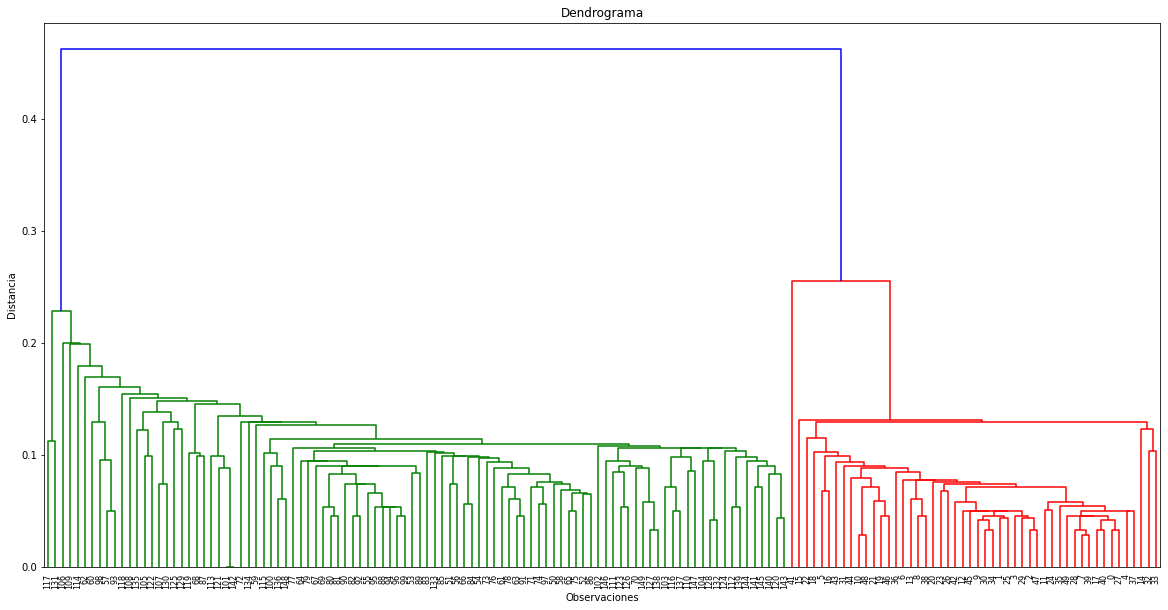

In [13]:
max_d = 7.08
plt.figure(figsize=(20, 10))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()